=== Distribution par classe de risque ===
Normal: 90 observations (15.2%)
Ostéopénie: 225 observations (37.9%)
Ostéoporose: 279 observations (47.0%)


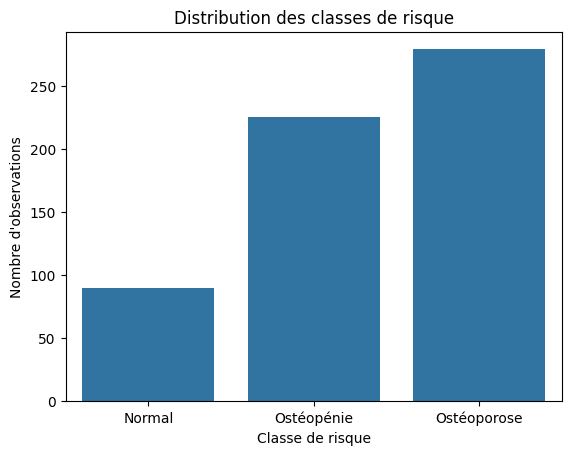


=== Statistiques descriptives par classe de risque ===

--- BV(mm^3) ---
                 mean        std    median
Risk                                      
Normal       90623.71  134936.09  40448.89
Ostéopénie   70598.34  117746.44  41787.00
Ostéoporose   9975.74   28712.22   6600.76

--- TV(mm^3) ---
                  mean        std     median
Risk                                        
Normal       258812.77  372053.42  133554.73
Ostéopénie   203705.17  342471.87  127995.00
Ostéoporose   24692.55   71891.59   17159.45

--- BV/TV ---
             mean   std  median
Risk                           
Normal       0.36  0.08    0.37
Ostéopénie   0.34  0.11    0.34
Ostéoporose  0.39  0.10    0.39

--- Tb.Th mean (mm) ---
              mean   std  median
Risk                            
Normal       10.12  2.51    9.75
Ostéopénie    9.49  7.84    7.63
Ostéoporose   6.44  3.93    5.49

--- Tb.Sp mean (mm) ---
              mean    std  median
Risk                             
Normal    

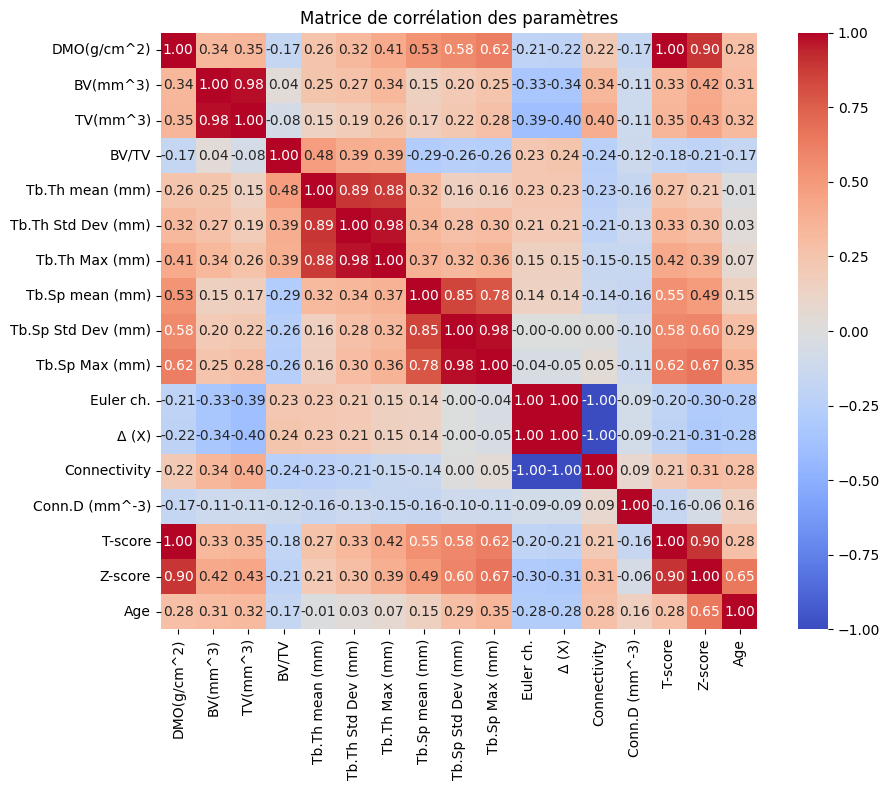


=== Moyennes morphométriques par zone anatomique ===
   Zone  BV/TV_mean  BV/TV_std  Tb.Th mean (mm)_mean  Tb.Th mean (mm)_std  \
0   1.0       0.472      0.082                 9.361                5.263   
1   2.0       0.408      0.100                 8.288                4.601   
2   3.0       0.399      0.091                 8.106                6.042   
3   4.0       0.383      0.085                 8.041                3.946   
4   5.0       0.360      0.068                 7.125                3.559   
5   6.0       0.364      0.090                 7.888                5.967   
6   7.0       0.326      0.087                 8.516                5.621   
7   8.0       0.310      0.085                 7.736                6.051   
8   9.0       0.307      0.102                 8.297                9.510   

   Tb.Sp mean (mm)_mean  Tb.Sp mean (mm)_std  T-score_mean  T-score_std  
0                12.242                6.176        -2.038        1.047  
1                16.935    

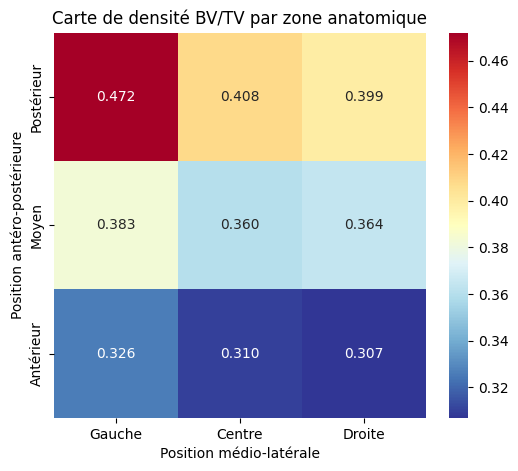


=== ANALYSE STATISTIQUE : ANOVA PAR ZONE ===
ANOVA BV/TV entre zones : F = 23.802, p = 0.0000 → significatif
ANOVA Tb.Th entre zones : F = 0.710, p = 0.6824 → non significatif
ANOVA Tb.Sp entre zones : F = 4.764, p = 0.0000 → significatif


In [ ]:
#PRETRAITEMENT
# Étape 2 : Importer les bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Étape 3 : Charger et nettoyer le dataset
df = pd.read_csv("Preprocessing_final - Feuille 1.csv")  # Adapte le nom si besoin
df.columns = df.columns.str.strip()  # Nettoyer espaces dans noms colonnes

# Étape 4 : Distribution par classe de risque (essentiel pour la compréhension du dataset)
print("=== Distribution par classe de risque ===")
risk_labels = {0: 'Normal', 1: 'Ostéopénie', 2: 'Ostéoporose'}
risk_counts = df['Risk'].value_counts().sort_index()
total = len(df)
for risk_level, count in risk_counts.items():
    percentage = (count / total) * 100
    print(f"{risk_labels.get(risk_level)}: {count} observations ({percentage:.1f}%)")

sns.countplot(data=df, x='Risk')
plt.xticks([0,1,2], ['Normal', 'Ostéopénie', 'Ostéoporose'])
plt.title("Distribution des classes de risque")
plt.xlabel("Classe de risque")
plt.ylabel("Nombre d'observations")
plt.show()

# Étape 5 : Statistiques descriptives par classe de risque pour paramètres clés
parametres = ['BV(mm^3)', 'TV(mm^3)', 'BV/TV', 'Tb.Th mean (mm)', 'Tb.Sp mean (mm)',
              'Conn.D (mm^-3)', 'DMO(g/cm^2)', 'T-score', 'Z-score']

print("\n=== Statistiques descriptives par classe de risque ===")
for param in parametres:
    stats = df.groupby('Risk')[param].agg(['mean', 'std', 'median']).round(2)
    stats.rename(index=risk_labels, inplace=True)
    print(f"\n--- {param} ---")
    print(stats)

# Gradient antéro-postérieur zones 1,2,3 vs 7
zones_post = df[df['Zone'].isin([1, 2, 3])].groupby('Niveau de vertèbre')[['Tb.Th mean (mm)', 'Tb.Sp mean (mm)', 'BV/TV']].mean()
zones_ant = df[df['Zone'].isin([7, 8, 9])].groupby('Niveau de vertèbre')[['Tb.Th mean (mm)', 'Tb.Sp mean (mm)', 'BV/TV']].mean()
gradient_ant_post = pd.DataFrame({
    'Niveau de vertèbre': zones_ant.index,
    'Gradient_ant_post_BV_TV': zones_ant['BV/TV'] - zones_post['BV/TV'],
    'Gradient_ant_post_Tb.Th': zones_ant['Tb.Th mean (mm)'] - zones_post['Tb.Th mean (mm)'],
    'Gradient_ant_post_Tb.Sp': zones_ant['Tb.Sp mean (mm)'] - zones_post['Tb.Sp mean (mm)'],
})


# Gradient central-périphérique : zone 5 vs périphériques [1,2,3,4,6,7,9]
zone_centrale = df[df['Zone'] == 5].groupby('Niveau de vertèbre')[['Tb.Th mean (mm)', 'Tb.Sp mean (mm)', 'BV/TV']].mean()
zones_periph = df[df['Zone'].isin([1, 2, 3, 4, 6, 7, 9])].groupby('Niveau de vertèbre')[['Tb.Th mean (mm)', 'Tb.Sp mean (mm)', 'BV/TV']].mean()

gradient_cent_periph = pd.DataFrame({
    'Niveau de vertèbre': zone_centrale.index,
    'Gradient_cent_periph_BV_TV': zone_centrale['BV/TV'] - zones_periph['BV/TV'],
    'Gradient_cent_periph_Tb.Th': zone_centrale['Tb.Th mean (mm)'] - zones_periph['Tb.Th mean (mm)'],
    'Gradient_cent_periph_Tb.Sp': zone_centrale['Tb.Sp mean (mm)'] - zones_periph['Tb.Sp mean (mm)'],
})



# Gradient médio-latéral zone 2,5,8 vs zone 1,3,4,6,7,9
zones_milieu = df[df['Zone'].isin([2, 5, 8])].groupby('Niveau de vertèbre')[['Tb.Th mean (mm)', 'Tb.Sp mean (mm)', 'BV/TV']].mean()
zones_cotes = df[df['Zone'].isin([1, 3, 4, 6, 7, 9])].groupby('Niveau de vertèbre')[['Tb.Th mean (mm)', 'Tb.Sp mean (mm)', 'BV/TV']].mean()
gradient_medio_lat = pd.DataFrame({
    'Niveau de vertèbre': zones_milieu.index,
    'Gradient_medio_lat_BV_TV': zones_milieu['BV/TV'] - zones_cotes['BV/TV'],
    'Gradient_medio_lat_Tb.Th': zones_milieu['Tb.Th mean (mm)'] - zones_cotes['Tb.Th mean (mm)'],
    'Gradient_medio_lat_Tb.Sp': zones_milieu['Tb.Sp mean (mm)'] - zones_cotes['Tb.Sp mean (mm)'],
})

print("\n=== Gradients anatomiques calculés ===")
print("Antéro-postérieur:")
print(gradient_ant_post.head())
print("Central-périphérique:")
print(gradient_cent_periph.head())
print("Médio-latéral:")
print(gradient_medio_lat.head())

# Analyse asymétrie gauche-droite CORRIGÉE
# Selon l'image CT : zones [1,4,7] = côté DROIT patient, zones [3,6,9] = côté GAUCHE patient
zones_droite_patient = df[df['Zone'].isin([1,4,7])].groupby('Niveau de vertèbre')[['BV/TV', 'Tb.Th mean (mm)', 'Tb.Sp mean (mm)']].mean()
zones_gauche_patient = df[df['Zone'].isin([3,6,9])].groupby('Niveau de vertèbre')[['BV/TV', 'Tb.Th mean (mm)', 'Tb.Sp mean (mm)']].mean()

asym_lat_corrigee = pd.DataFrame({
    'Niveau de vertèbre': zones_droite_patient.index,
    'Asym_lat_BV_TV': zones_droite_patient['BV/TV'] - zones_gauche_patient['BV/TV'],
    'Asym_lat_Tb.Th': zones_droite_patient['Tb.Th mean (mm)'] - zones_gauche_patient['Tb.Th mean (mm)'],
    'Asym_lat_Tb.Sp': zones_droite_patient['Tb.Sp mean (mm)'] - zones_gauche_patient['Tb.Sp mean (mm)'],
})

print("\n=== Asymétrie médio-latérale CORRIGÉE (DROITE - GAUCHE patient) ===")
print(asym_lat_corrigee)

print("\n=== RÉSUMÉ DES INSIGHTS ===")

# Calcul proportion zones faibles par zone et par niveau vertébral
if 'Faible' in df.columns:
    prop_faibles = df.groupby('Zone')['Faible'].mean() * 100  # en %
    prop_faibles_vert = df.groupby('Niveau de vertèbre')['Faible'].mean() * 100
else:
    seuil_fragilite = -2.5
    df['Faible'] = (df['T-score'] <= seuil_fragilite) & (df['BV/TV'] < 0.15)
    prop_faibles = df.groupby('Zone')['Faible'].mean() * 100
    prop_faibles_vert = df.groupby('Niveau de vertèbre')['Faible'].mean() * 100

print(f"1. Zone la plus fragile: Zone {prop_faibles.idxmax()} ({prop_faibles.max():.1f}% de zones faibles)")
print(f"2. Niveau le plus fragile: L{prop_faibles_vert.idxmax()} ({prop_faibles_vert.max():.1f}% de zones faibles)")


# Interprétation des gradients
print("\n5. Interprétation des gradients :")

if gradient_ant_post['Gradient_ant_post_BV_TV'].mean() < 0:
    print("   • Zones POSTÉRIEURES plus denses que ANTÉRIEURES (normal - support mécanique)")
else:
    print("   • Zones ANTÉRIEURES plus denses que POSTÉRIEURES (inhabituel)")

if gradient_cent_periph['Gradient_cent_periph_BV_TV'].mean() > 0:
    print("   • Zone CENTRALE plus dense que PÉRIPHÉRIE (normal - cœur structural)")
else:
    print("   • PÉRIPHÉRIE plus dense que zone CENTRALE (inhabituel)")

# Interprétation asymétrie médio-latérale CORRIGÉE
if asym_lat_corrigee['Asym_lat_BV_TV'].mean() > 0:
    print("   • Légère dominance de la densité osseuse côté DROIT du patient (à surveiller)")
else:
    print("   • Légère dominance de la densité osseuse côté GAUCHE du patient (à surveiller)")

# Carte de densité BV/TV par zone anatomique

zone_matrix = np.array([
    [zone_stats.loc[1, 'BV/TV_mean'], zone_stats.loc[2, 'BV/TV_mean'], zone_stats.loc[3, 'BV/TV_mean']],  # Postérieur
    [zone_stats.loc[4, 'BV/TV_mean'], zone_stats.loc[5, 'BV/TV_mean'], zone_stats.loc[6, 'BV/TV_mean']],  # Moyen
    [zone_stats.loc[7, 'BV/TV_mean'], zone_stats.loc[8, 'BV/TV_mean'], zone_stats.loc[9, 'BV/TV_mean']]   # Antérieur
])

plt.figure(figsize=(6, 5))
sns.heatmap(zone_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r',
            xticklabels=['Gauche', 'Centre', 'Droite'],
            yticklabels=['Postérieur', 'Moyen', 'Antérieur'])
plt.title('Carte de densité BV/TV par zone anatomique')
plt.ylabel('Position antéro-postérieure')
plt.xlabel('Position médio-latérale')
plt.show()


#test anova

from scipy.stats import f_oneway

print("\n=== ANALYSE STATISTIQUE : ANOVA PAR ZONE ===")

# Analyse ANOVA : BV/TV par zone (zones 1 à 9)
grouped_BVTV = [df[df['Zone'] == z]['BV/TV'].dropna() for z in sorted(df['Zone'].unique())]
f_stat_bvtv, p_val_bvtv = f_oneway(*grouped_BVTV)
print(f"ANOVA BV/TV entre zones : F = {f_stat_bvtv:.3f}, p = {p_val_bvtv:.4f} {'→ significatif' if p_val_bvtv < 0.05 else '→ non significatif'}")

# ANOVA : Tb.Th mean par zone
grouped_TbTh = [df[df['Zone'] == z]['Tb.Th mean (mm)'].dropna() for z in sorted(df['Zone'].unique())]
f_stat_tbth, p_val_tbth = f_oneway(*grouped_TbTh)
print(f"ANOVA Tb.Th entre zones : F = {f_stat_tbth:.3f}, p = {p_val_tbth:.4f} {'→ significatif' if p_val_tbth < 0.05 else '→ non significatif'}")

# ANOVA : Tb.Sp mean par zone
grouped_TbSp = [df[df['Zone'] == z]['Tb.Sp mean (mm)'].dropna() for z in sorted(df['Zone'].unique())]
f_stat_tbsp, p_val_tbsp = f_oneway(*grouped_TbSp)
print(f"ANOVA Tb.Sp entre zones : F = {f_stat_tbsp:.3f}, p = {p_val_tbsp:.4f} {'→ significatif' if p_val_tbsp < 0.05 else '→ non significatif'}")





In [ ]:
#NETTOYAGE
import pandas as pd

# === 1. Import du fichier ===
df = pd.read_csv("Preprocessing_final - Feuille 1.csv")

# === 2. Calcul des gradients ant-post par vertèbre ===
gradients = []
for (dmo, vertebre), sub_df in df.groupby(['DMO(g/cm^2)', 'Niveau de vertèbre']):
    row = {'DMO(g/cm^2)': dmo, 'Niveau de vertèbre': vertebre}
    for param, name in [('BV/TV', 'BVTV'), ('Tb.Th mean (mm)', 'Tb.Th')]:
        val_ant = sub_df[sub_df['Zone'].isin([7, 8, 9])][param].mean()
        val_post = sub_df[sub_df['Zone'].isin([1, 2, 3])][param].mean()
        row[f'Gradient_ant_post_{name}'] = val_ant - val_post
    gradients.append(row)
df_grad = pd.DataFrame(gradients)

# === 3. Score de fragilité pondéré par zone ===
zone_weights = {
    1: 0.9, 2: 1.0, 3: 0.9,
    4: 0.8, 5: 1.2, 6: 0.8,
    7: 0.6, 8: 0.7, 9: 0.6
}
df['Poids_zone'] = df['Zone'].map(zone_weights)
df['Score_fragilité'] = df['Poids_zone'] * (1 - df['BV/TV'])

# === 4. Moyenne du score de fragilité par vertèbre ===
df_frag = df.groupby(['DMO(g/cm^2)', 'Niveau de vertèbre'])['Score_fragilité'].mean().reset_index()
df_frag.columns = ['DMO(g/cm^2)', 'Niveau de vertèbre', 'Fragilité_moyenne']

# === 5. Fusion des données ===
df_final = df.merge(df_grad, on=['DMO(g/cm^2)', 'Niveau de vertèbre'], how='left')
df_final = df_final.merge(df_frag, on=['DMO(g/cm^2)', 'Niveau de vertèbre'], how='left')

# === 6. Calcul du Ratio de compacité ===
df_final['Ratio_compacite'] = df_final['Tb.Th mean (mm)'] / (df_final['Tb.Sp mean (mm)'] + 1e-6)

# === 7. Sélection des colonnes finales ===
# Attention à l’espace après 'Risk '
colonnes_finales = [
    'Niveau de vertèbre', 'Zone', 'Age', 'DMO(g/cm^2)', 'BV/TV',
    'Tb.Th mean (mm)', 'Tb.Sp mean (mm)', 'Conn.D (mm^-3)',
    'T-score', 'Z-score', 'Gradient_ant_post_BVTV',
    'Gradient_ant_post_Tb.Th', 'Fragilité_moyenne',
    'Ratio_compacite', 'Risk'
]
df_final = df_final[colonnes_finales]

# === 8. Export final ===
df_final.to_csv("donnees_finales_zone_par_zone.csv", index=False,sep = ';')
print(" Fichier CSV généré avec noms de colonnes originaux, gradients, fragilité et Ratio_compacite.")
files.download("donnees_finales_zone_par_zone.csv")
# ===9. Standardisation ===
from sklearn.preprocessing import StandardScaler

colonnes_non_standardisees = ['Niveau de vertèbre', 'Zone', 'Age', 'Risk ']
colonnes_a_standardiser = [col for col in df_final.columns if col not in colonnes_non_standardisees]

# Appliquer la standardisation
scaler = StandardScaler()
df_scaled = df_final.copy()
df_scaled[colonnes_a_standardiser] = scaler.fit_transform(df_scaled[colonnes_a_standardiser])

# Sauvegarder en CSV
df_scaled.to_csv('data_features_standardise.csv', index=False, sep = ';')
files.download("data_features_standardise.csv")

 Fichier CSV généré avec noms de colonnes originaux, gradients, fragilité et Ratio_compacite.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Index(['Niveau de vertèbre', 'Zone', 'Age', 'DMO(g/cm^2)', 'BV/TV',
       'Tb.Th mean (mm)', 'Tb.Sp mean (mm)', 'Conn.D (mm^-3)', 'T-score',
       'Z-score', 'Gradient_ant_post_BVTV', 'Gradient_ant_post_Tb.Th',
       'Fragilité_moyenne', 'Ratio_compacite', 'Risk'],
      dtype='object')
 Matrice de corrélation :
T-score                    1.000000
DMO(g/cm^2)                0.996055
Z-score                    0.898881
Tb.Sp mean (mm)            0.546530
Fragilité_moyenne          0.354312
Gradient_ant_post_Tb.Th    0.331459
Gradient_ant_post_BVTV     0.286726
Age                        0.278094
Tb.Th mean (mm)            0.265025
Conn.D (mm^-3)            -0.157028
Ratio_compacite           -0.158255
BV/TV                     -0.179820
Name: T-score, dtype: float64


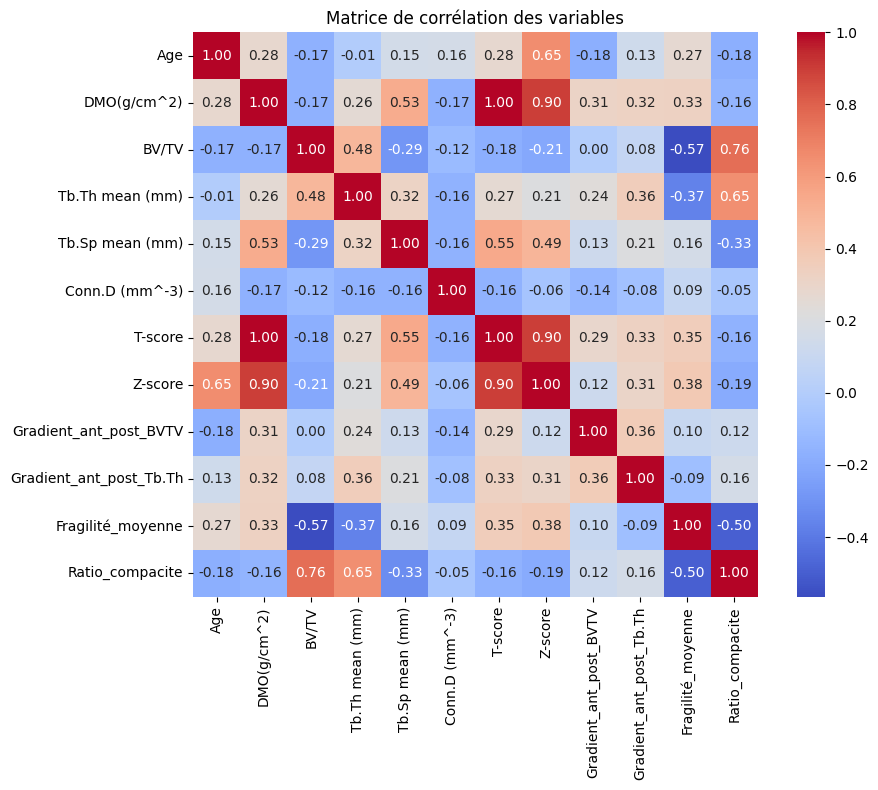

In [ ]:
#MATRICE DE CORRELATION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Charger le fichier généré précédemment
df = pd.read_csv("donnees_finales_zone_par_zone.csv", sep=';')
print(df.columns)
# 2. Vérifier les colonnes numériques
colonnes_numeriques = [
    'Age', 'DMO(g/cm^2)', 'BV/TV', 'Tb.Th mean (mm)', 'Tb.Sp mean (mm)',
    'Conn.D (mm^-3)', 'T-score', 'Z-score',
    'Gradient_ant_post_BVTV', 'Gradient_ant_post_Tb.Th',
    'Fragilité_moyenne', 'Ratio_compacite'
]

# 3. Calculer la matrice de corrélation
mat_corr = df[colonnes_numeriques].corr()

# 4. Afficher la matrice (valeurs uniquement)
print(" Matrice de corrélation :")
print(mat_corr['T-score'].sort_values(ascending=False))  # trié par corrélation avec T-score

# 5. Visualiser sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mat_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation des variables")
plt.tight_layout()
plt.show()
